# Exploring Dandiset 001174: Calcium imaging in SMA and M1 of macaques

**Important:** This notebook was AI-generated and has not been fully verified. Use caution when interpreting the code or results.

## Overview of the Dandiset
This notebook explores Dandiset 001174, which contains calcium imaging data from the supplementary motor area (SMA) and primary motor area (M1) of macaques. The data were acquired using one-photon calcium imaging with a microendoscope while the animals were at rest or engaged in an arm reaching task.

You can find the Dandiset here: [https://dandiarchive.org/dandiset/001174/0.250331.2218](https://dandiarchive.org/dandiset/001174/0.250331.2218)

## What This Notebook Covers
This notebook demonstrates how to:

*   Load the Dandiset metadata using the DANDI API.
*   Access and visualize data from an NWB file within the Dandiset.
*   Explore calcium imaging data, including event amplitudes and image masks.

## Required Packages
The following packages are required to run this notebook, and are assumed to be already installed:

*   `pynwb`
*   `h5py`
*   `remfile`
*   `matplotlib`
*   `numpy`
*   `seaborn`

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001174", "0.250331.2218")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Calcium imaging in SMA and M1 of macaques
Dandiset URL: https://dandiarchive.org/dandiset/001174/0.250331.2218

First 5 assets:
- sub-V/sub-V_ses-20230309T110929_ophys.nwb (ID: a2b04c7f-f671-4a55-ac36-5df4d842dfc2)
- sub-Q/sub-Q_ophys.nwb (ID: de07db56-e7f3-4809-9972-755c51598e8d)
- sub-Q/sub-Q_ses-20220922T131747_ophys.nwb (ID: ac161d0e-7642-48bd-9bef-8eff59319d48)
- sub-Q/sub-Q_ses-20221003T131952_ophys.nwb (ID: 9c3678d5-22c3-402c-8cd4-6bc38c4d61e3)
- sub-Q/sub-Q_ses-20221028T121142_ophys.nwb (ID: b4e6bbf7-0564-4628-b8f0-680fd9b8d4ea)


## Loading an NWB File and Exploring Metadata
This section demonstrates how to load one of the NWB files in the Dandiset and explore its metadata. We will be using the file `sub-F/sub-F_ses-20240213T110430_ophys.nwb`.

In [2]:
import pynwb
import h5py
import remfile

# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/193fee16-550e-4a8f-aab8-2383f6d57a03/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print some basic information about the NWB file
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")

Session description: Calcium imaging in SMA during the spontaneous condition
Identifier: cfb46dc9-b1e4-4fa9-bbf7-f3314fd5c5b3
Session start time: 2024-02-13 11:04:30.267000+00:00


## Summarizing the Contents of the NWB File
Here's a summary of the contents of the NWB file, based on the available metadata.

### Data Interfaces
The NWB file contains the following data interfaces under the `processing` module named `ophys`:

*   `EventAmplitude`: Amplitude of neural events associated with spatial footprints.
*   `Fluorescence`: Fluorescence data associated with spatial footprints.
*   `ImageSegmentation`: Footprints of individual cells obtained by segmenting the field of view.

The link to that NWB file on neurosift so the user can explore that if they wish: [https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/193fee16-550e-4a8f-aab8-2383f6d57a03/download/&dandisetId=001174&dandisetVersion=draft](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/193fee16-550e-4a8f-aab8-2383f6d57a03/download/&dandisetId=001174&dandisetVersion=draft)

## Loading and Visualizing Data from the NWB File
This section demonstrates how to load and visualize data from the NWB file. First, we will load the `EventAmplitude` data and plot it.

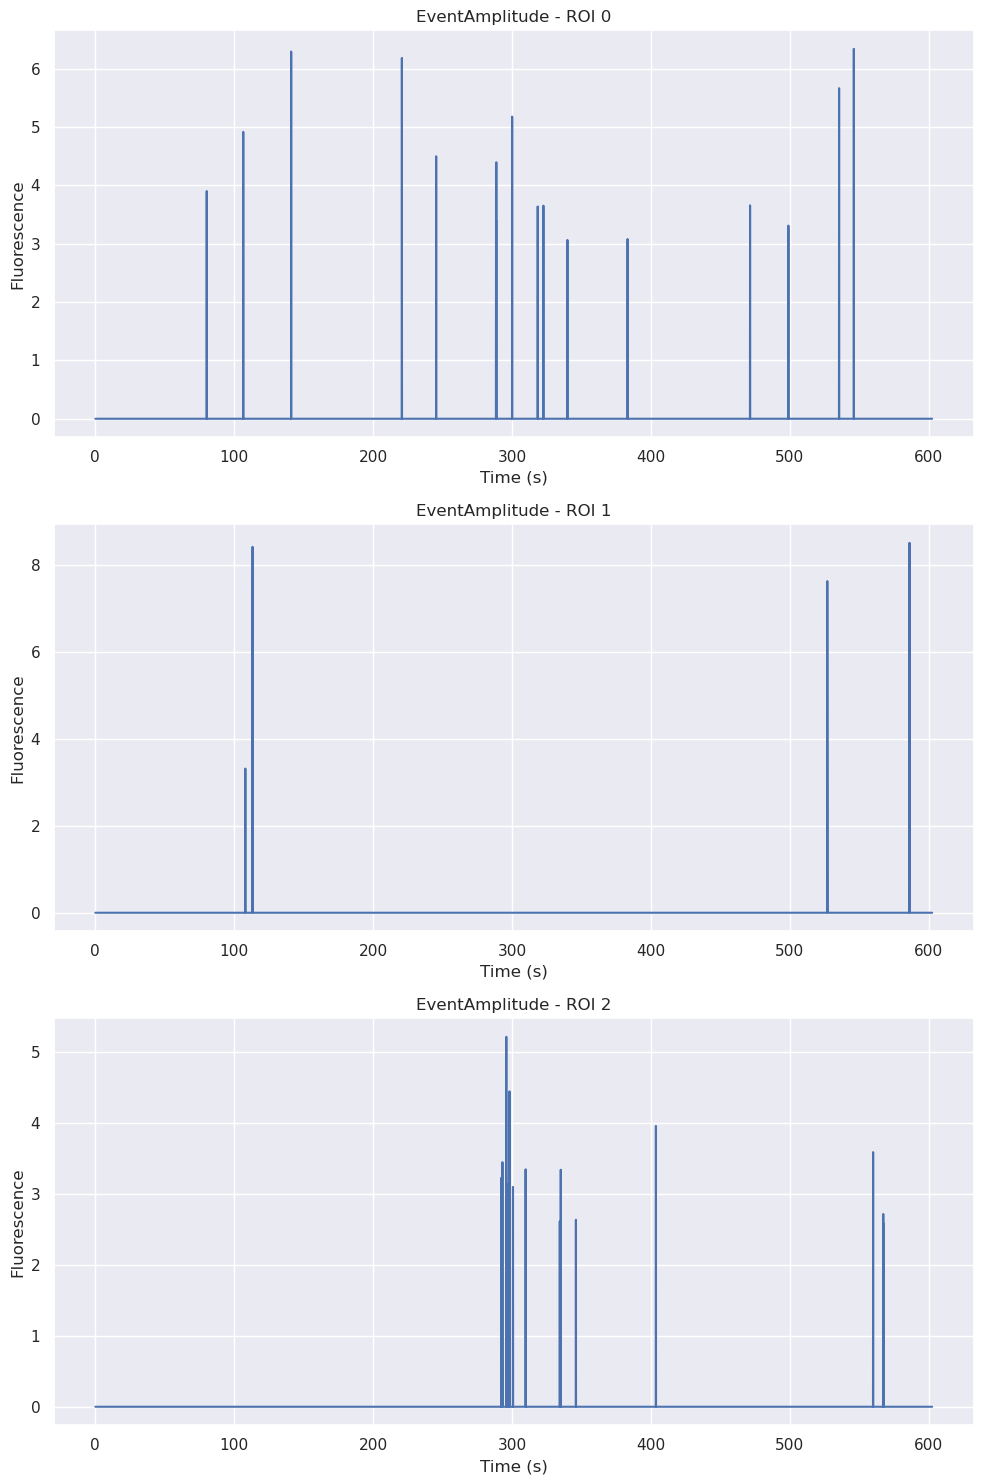

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

# Get EventAmplitude data
ophys = nwb.processing["ophys"]
data_interfaces = ophys.data_interfaces
event_amplitude = data_interfaces["EventAmplitude"]
event_amplitude_data = event_amplitude.data[:]

# Plot the EventAmplitude data for the first 3 ROIs
num_rois = min(3, event_amplitude_data.shape[1])  # Plot only the first 3 ROIs if available
time = np.linspace(0, event_amplitude_data.shape[0] / event_amplitude.rate, event_amplitude_data.shape[0])
plt.figure(figsize=(10, 5 * num_rois))
for i in range(num_rois):
    plt.subplot(num_rois, 1, i + 1)
    plt.plot(time, event_amplitude_data[:, i])
    plt.xlabel("Time (s)")
    plt.ylabel("Fluorescence")
    plt.title(f"EventAmplitude - ROI {i}")

plt.tight_layout()
plt.show()

The plot above shows the fluorescence amplitude over time for the first 3 regions of interest (ROIs). We can see that the fluorescence amplitude varies over time, indicating neural activity.

Next, we will load and visualize the image masks for the ROIs.

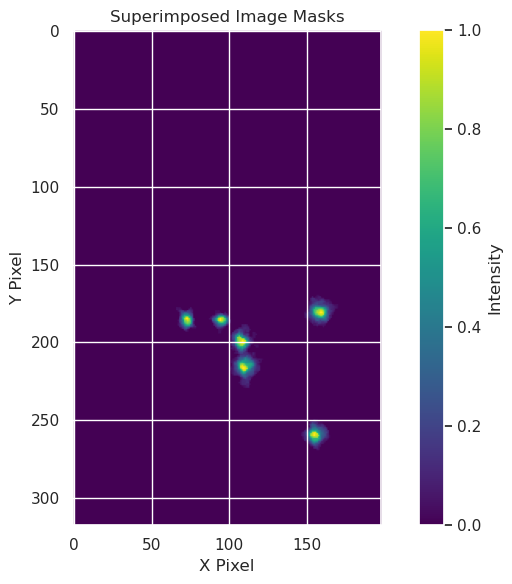

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Get image masks
ophys = nwb.processing["ophys"]
data_interfaces = ophys.data_interfaces
plane_segmentation = data_interfaces["ImageSegmentation"].plane_segmentations["PlaneSegmentation"]
image_masks = plane_segmentation.image_mask[:]

# Plot the image masks using a heatmap
plt.figure(figsize=(8, 6))

# Superimpose all image masks
superimposed_mask = np.max(image_masks, axis=0)

plt.imshow(superimposed_mask, cmap='viridis')
plt.colorbar(label="Intensity")
plt.title("Superimposed Image Masks")
plt.xlabel("X Pixel")
plt.ylabel("Y Pixel")

plt.tight_layout()
plt.show()

The plot above shows the superimposed image masks for all ROIs. The intensity values range from 0 to 1, and the distinct clusters represent the spatial distribution of the image masks.

## Findings and Future Directions
In this notebook, we explored calcium imaging data from the SMA and M1 of macaques. We loaded the Dandiset metadata, accessed data from an NWB file, and visualized event amplitudes and image masks.

Possible future directions for analysis include:

*   Analyzing the relationships between event amplitudes and behavior.
*   Investigating the spatial distribution of neuronal activity.
*   Comparing neuronal activity across different conditions.